In [14]:
#importing some needed libraries for analysis...
import pandas as pd
import numpy as np

from ucimlrepo import fetch_ucirepo
from sklearn import  datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from KNN import KNN
import matplotlib.pyplot as plt
from sklearn.metrics import  confusion_matrix
import seaborn as sns
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler


In [15]:
wine = fetch_ucirepo(id=109) #taking our dataset

In [16]:
x=wine.data.features
y =wine.data.targets #we seperate our datasets
df= pd.DataFrame(x)
df["target"] =wine.data.targets #we create pandas Data Frame in this part


,Alcohol,Malicacid,Ash,Magnesium,Flavanoids,target
0,14.23,1.71,2.43,127,3.06,1
1,13.20,1.78,2.14,100,2.76,1
2,13.16,2.36,2.67,101,3.24,1
3,14.37,1.95,2.50,113,3.49,1
4,13.24,2.59,2.87,118,2.69,1
...,...,...,...,...,...,...
173,13.71,5.65,2.45,95,0.61,3
174,13.40,3.91,2.48,102,0.75,3
175,13.27,4.28,2.26,120,0.69,3
176,13.17,2.59,2.37,120,0.68,3


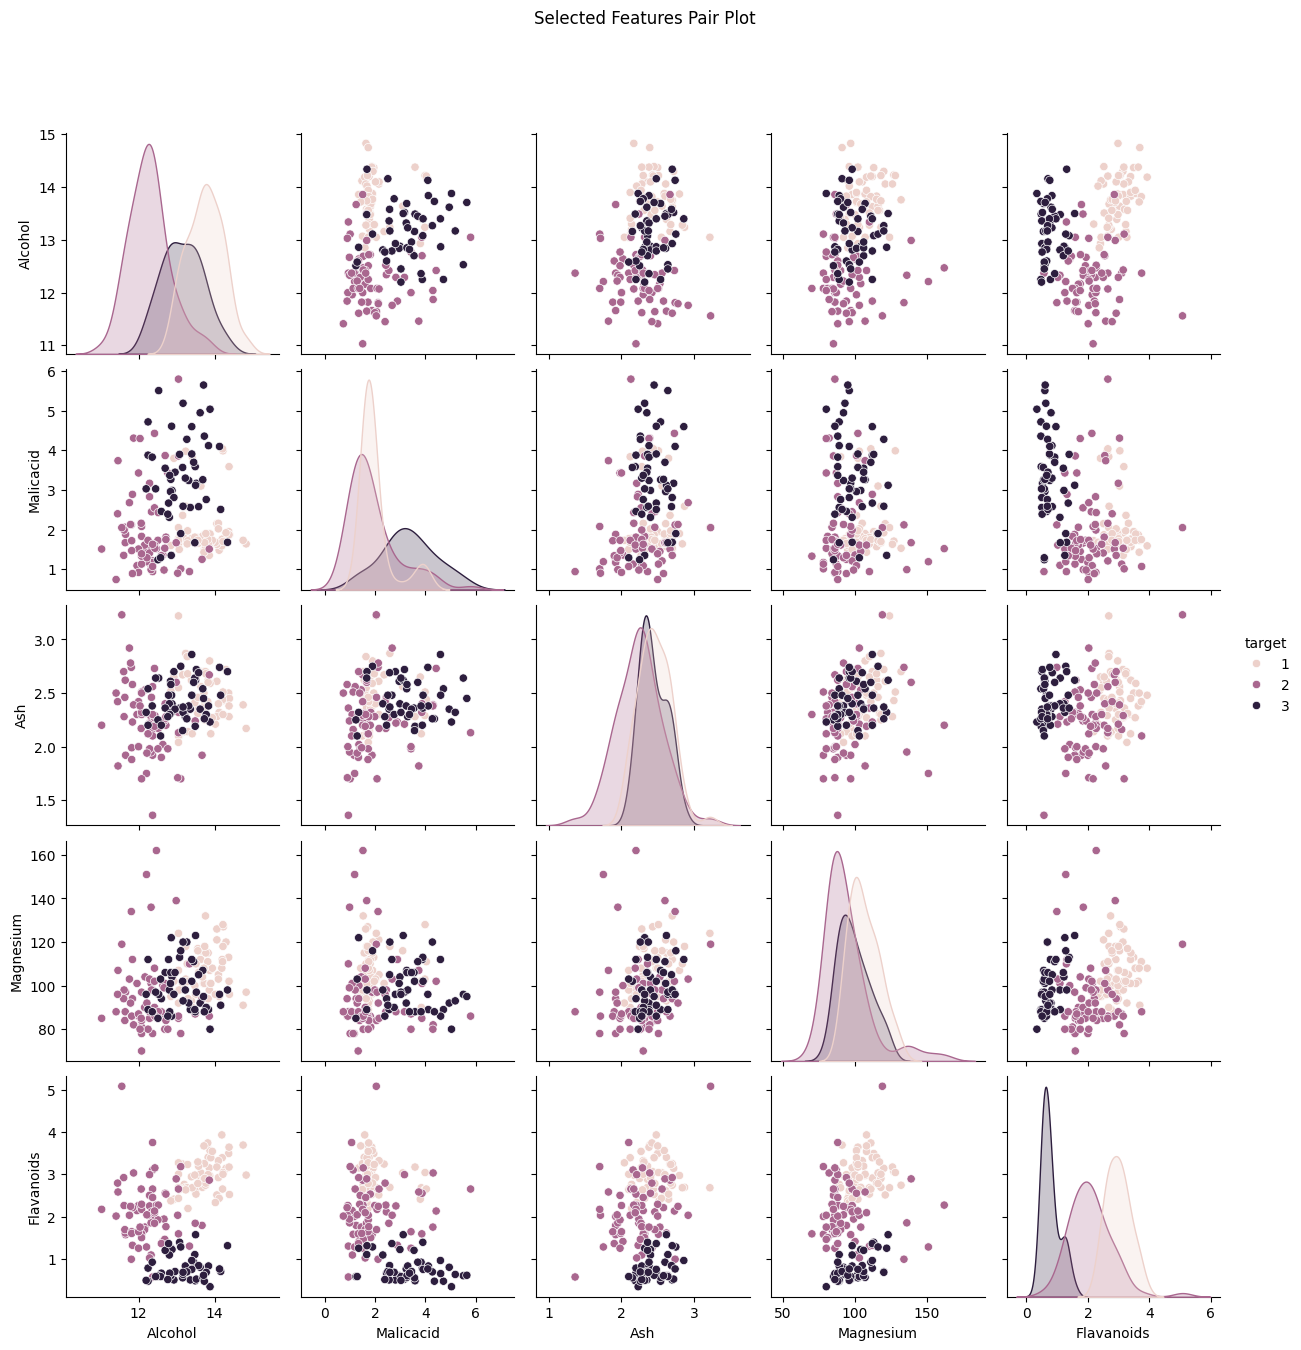

In [17]:
selected_features = ['Alcohol', 'Malicacid', 'Ash','Magnesium','Flavanoids', 'target']
df_selected = df[selected_features]
before=sns.pairplot(df_selected,hue='target')
before.fig.suptitle('Selected Features Pair Plot', y=1.08) # plotting graph of selected features
df_selected

In [18]:
a=df
b=a.pop("target")
x_train, x_test, y_train, y_test= train_test_split(a, b,
                                                   test_size= 0.2,
                                                   shuffle= True, #shuffle the data to avoid bias
                                                   random_state= 0)
#x_train= np.asarray(x_train)
#y_train= np.asarray(y_train) # split the data into train and test sets

In [19]:
#normalize data set
scaler= Normalizer().fit(x_train) # the  normalize scaler is fitted to the training set
normalized_x_train= scaler.transform(x_train) # the scaler is applied to the training set
normalized_x_test= scaler.transform(x_test) # the scaler is applied to the test set
Sc=StandardScaler()
normalized_x_train1= Sc.fit_transform(x_train) # the standartscaler is applied to the training set
normalized_x_test1= Sc.fit_transform(x_test) # the standartscaler is applied to the test set


Text(0.5, 1.08, 'Selected Features Pair Plot after normalizing')

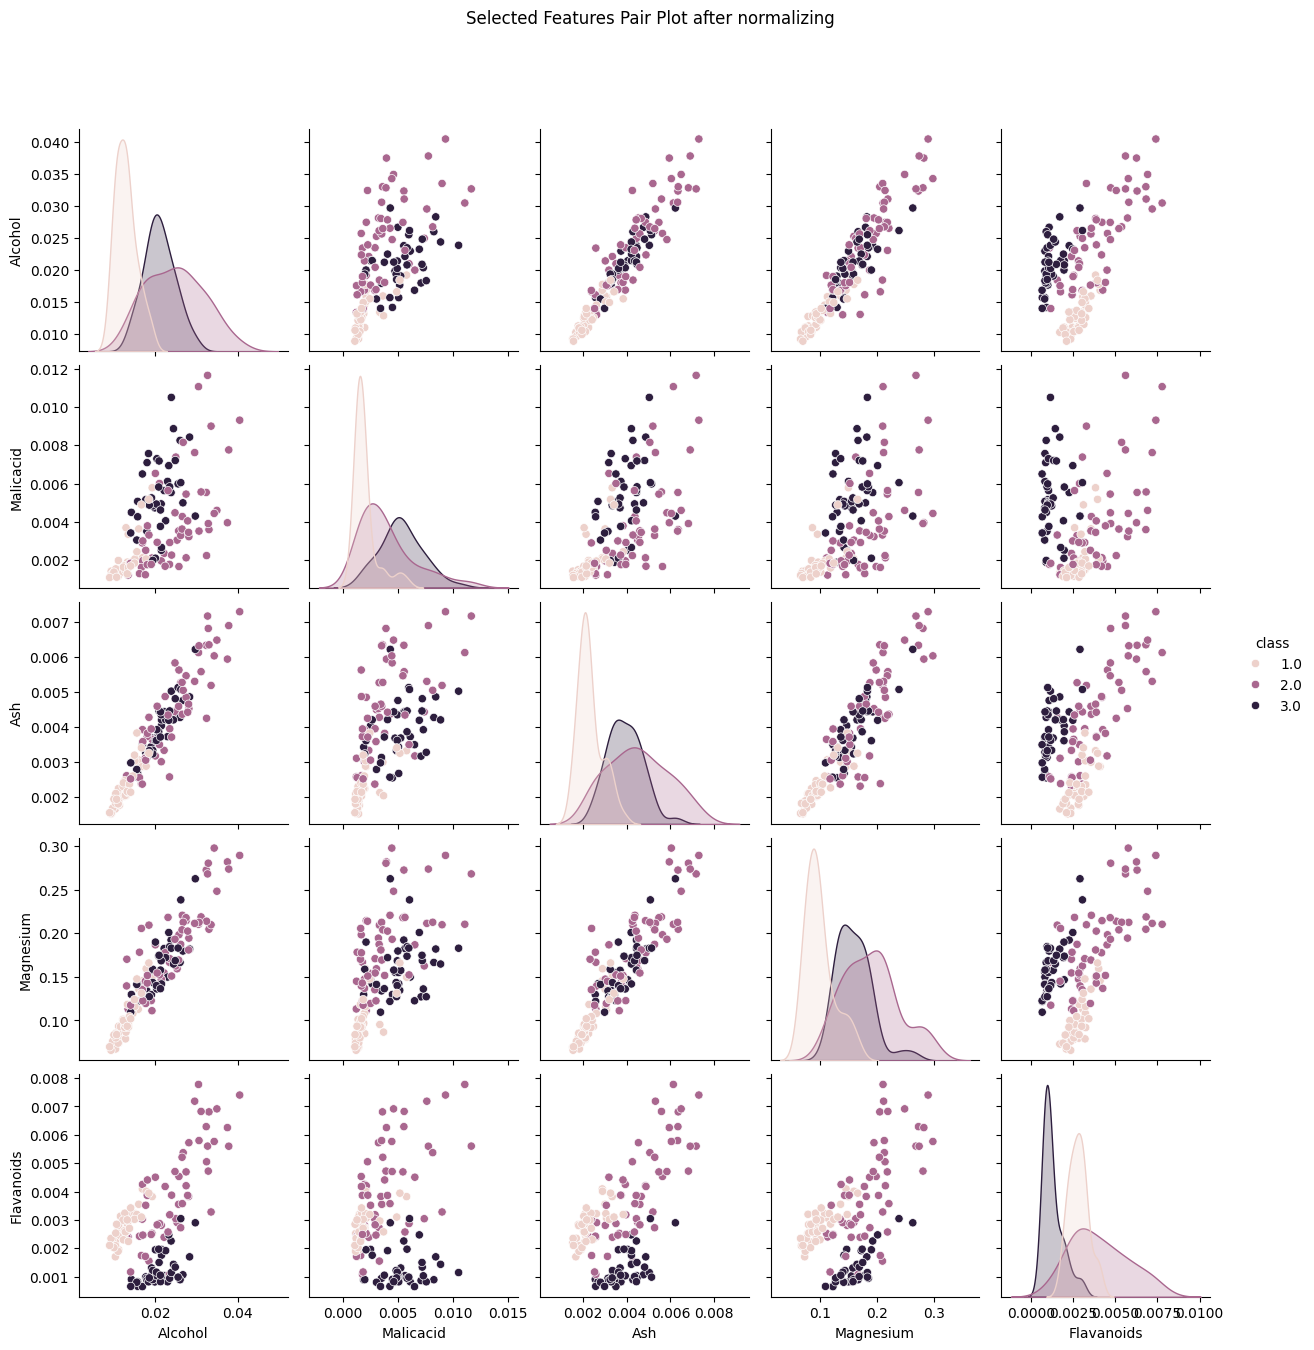

In [7]:
target_column_name = y.columns[0]
selected_features2 = ['Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Flavanoids']
df_2=pd.DataFrame(data= np.c_[normalized_x_train, y_train],columns=list(x.columns) + [target_column_name]) # Creating pandas data frame of normalizing data set
df_selected2 = df_2[selected_features2 + [target_column_name]]
after=sns.pairplot(df_selected2,hue=target_column_name)
after.fig.suptitle('Selected Features Pair Plot after normalizing', y=1.08) # Plotting graph of selected features after normalizing data set

Text(0.5, 1.08, 'Selected Features Pair Plot after normalizing with StandartScaler')

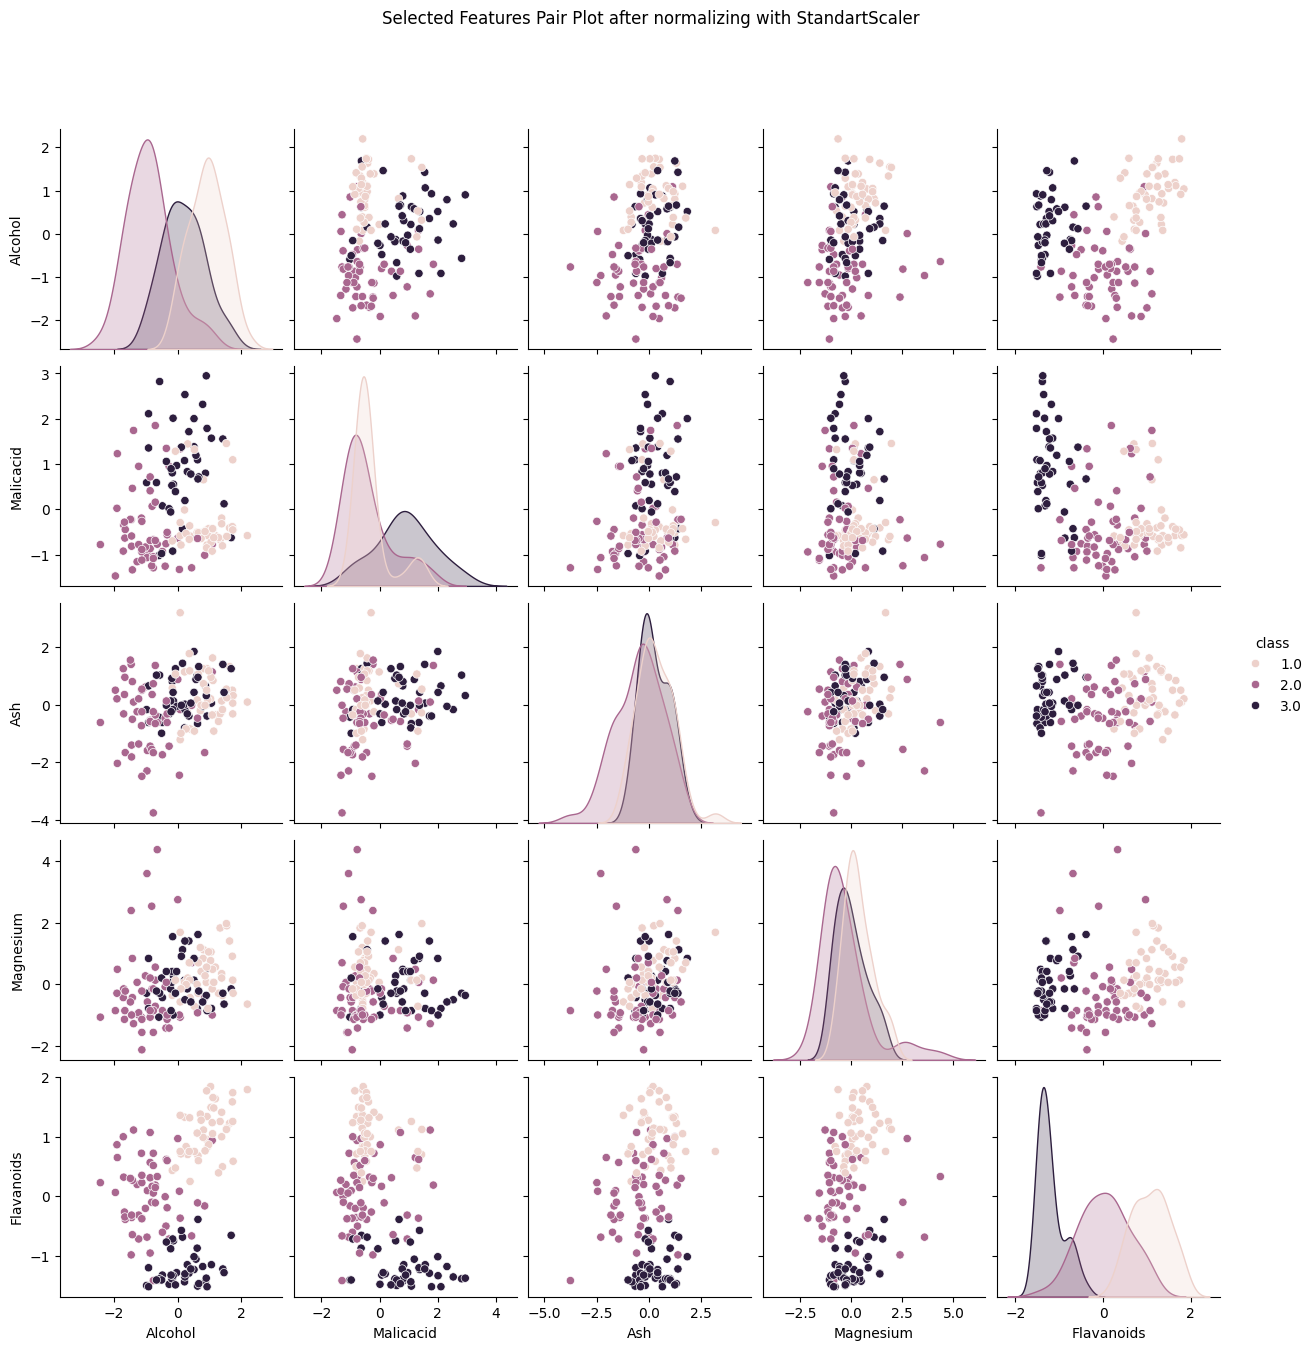

In [16]:
target_column_name = y.columns[0]
selected_features2 = ['Alcohol', 'Malicacid', 'Ash', 'Magnesium', 'Flavanoids']
df_2=pd.DataFrame(data= np.c_[normalized_x_train1, y_train],columns=list(x.columns) + [target_column_name]) # Creating pandas data frame of normalizing data set
df_selected2 = df_2[selected_features2 + [target_column_name]]
after=sns.pairplot(df_selected2,hue=target_column_name)
after.fig.suptitle('Selected Features Pair Plot after normalizing with StandartScaler', y=1.08) # Plotting graph of selected features after normalizing data set

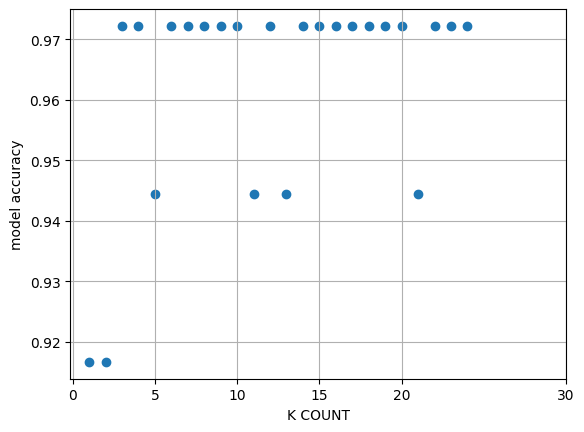

In [17]:
# Evaluate model accuracy for different values of K (1 to 24) using Sklearn KNN
k_range = range(1,25)
scores1= []
predic={}
for n in k_range:
    knn2=KNeighborsClassifier(n_neighbors=n)
    knn2.fit(normalized_x_train1,y_train)
    scores1.append(knn2.score(normalized_x_test1,y_test)) # Store accuracy for each K

# Plot accuracy vs. K value
plt.figure()
plt.xlabel("K COUNT")
plt.ylabel("model accuracy")
plt.scatter(k_range,scores1)
plt.grid()
plt.xticks([0,5,10,15,20,30])
plt.show()

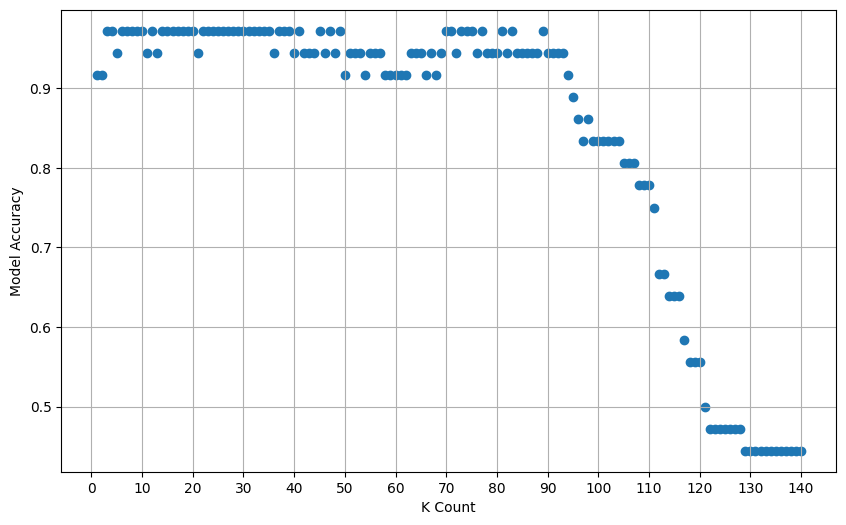

In [21]:
# Evaluate model accuracy for different values of K (1 to 140) using custom KNN implementation with Euclidean distance
k_range = range(1, 141)  # Update range to 1-140
fscores1 = []
predic = {}

for n in k_range:
    knn2=KNeighborsClassifier(n_neighbors=n)
    knn2.fit(normalized_x_train1,y_train)
    fscores1.append(knn2.score(normalized_x_test1,y_test)) # Store accuracy for each K

# Plot accuracy vs. K value for the custom KNN with Euclidean distance
plt.figure(figsize=(10, 6))  # Optional: for larger plots
plt.xlabel("K Count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, fscores1)
plt.grid()
plt.xticks(range(0, 141, 10))  # Set x-axis ticks from 0 to 140 with step 10
plt.show()

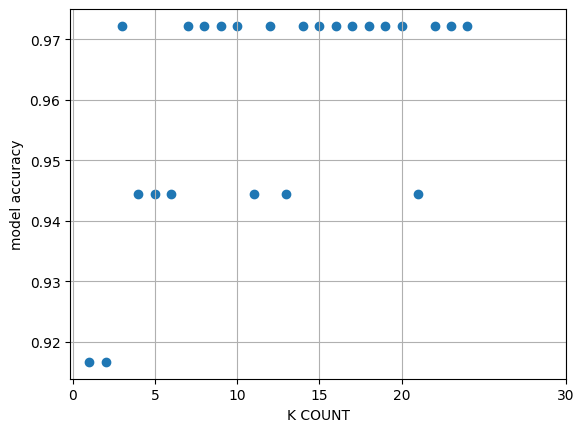

In [18]:
# Evaluate model accuracy for different values of K (1 to 24) using custom KNN implementation with Euclidean distance
k_range = range(1,25)
scores2= []
predic={}
for n in k_range:
    knnhandmade1=KNN(k=n,distance_metric="euclidean")
    knnhandmade1.fit(normalized_x_train1,y_train.values)
    ypred=knnhandmade1.predict(normalized_x_test1)
    predic[n]=ypred
    acc=np.sum(predic[n]==y_test)/len(y_test) # Calculate accuracy for each K
    scores2.append(acc)
    # Plot accuracy vs. K value for the custom KNN with Euclidean distance
plt.figure()
plt.xlabel("K COUNT")
plt.ylabel("model accuracy")
plt.scatter(k_range,scores2)
plt.grid()
plt.xticks([0,5,10,15,20,30])
plt.show()

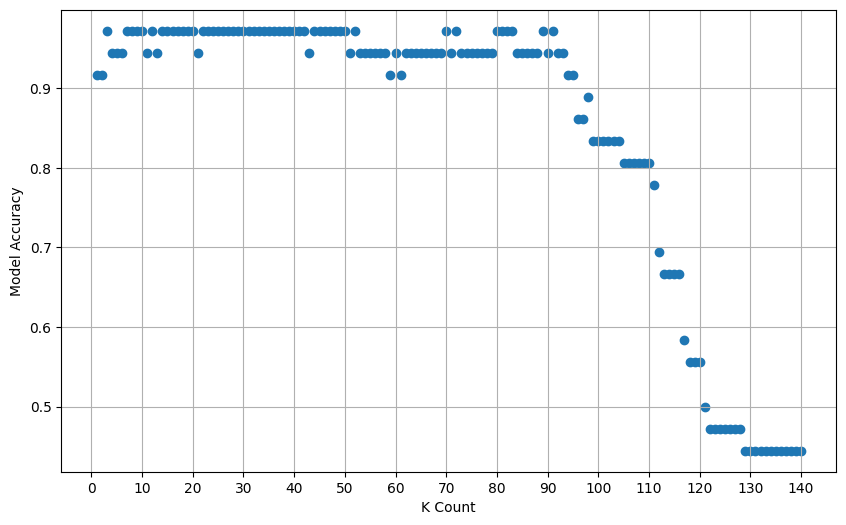

In [22]:
# Evaluate model accuracy for different values of K (1 to 140) using custom KNN implementation with Euclidean distance
k_range = range(1, 141)  # Update range to 1-140
fscores2 = []
predic = {}

for n in k_range:
    knnhandmade1 = KNN(k=n, distance_metric="euclidean")
    knnhandmade1.fit(normalized_x_train1, y_train.values)
    ypred = knnhandmade1.predict(normalized_x_test1)
    predic[n] = ypred
    acc = np.sum(predic[n] == y_test) / len(y_test)  # Calculate accuracy for each K
    fscores2.append(acc)

# Plot accuracy vs. K value for the custom KNN with Euclidean distance
plt.figure(figsize=(10, 6))  # Optional: for larger plots
plt.xlabel("K Count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, fscores2)
plt.grid()
plt.xticks(range(0, 141, 10))  # Set x-axis ticks from 0 to 140 with step 10
plt.show()

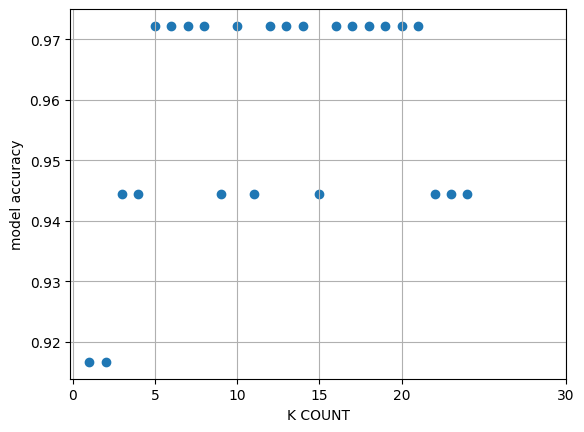

In [29]:
# Evaluate model accuracy for different values of K (1 to 24) using custom KNN implementation with Manhattan distance
k_range = range(1,25)
scores3= []
predic={}
for n in k_range:
    knnhandmade1=KNN(k=n,distance_metric="manhattan")

    knnhandmade1.fit(normalized_x_train1,y_train.values)
    ypred=knnhandmade1.predict(normalized_x_test1)
    predic[n]=ypred
    acc=np.sum(predic[n]==y_test)/len(y_test)
    scores3.append(acc)

# Plot accuracy vs. K value for the custom KNN with Manhattan distance
plt.figure()
plt.xlabel("K COUNT")
plt.ylabel("model accuracy")
plt.scatter(k_range,scores3)
plt.grid()
plt.xticks([0,5,10,15,20,30])
plt.show()

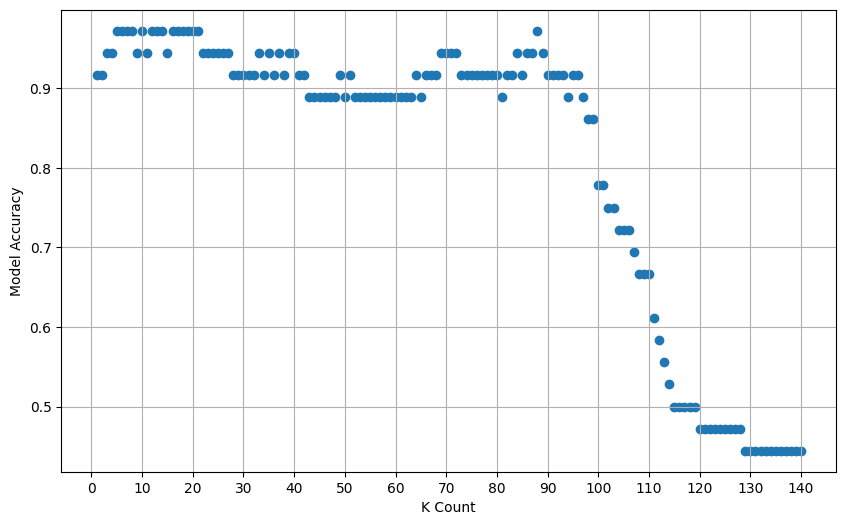

In [23]:
# Evaluate model accuracy for different values of K (1 to 140) using custom KNN implementation with Euclidean distance
k_range = range(1, 141)  # Update range to 1-140
fscores3 = []
predic = {}

for n in k_range:
    knnhandmade1 = KNN(k=n, distance_metric="manhattan")
    knnhandmade1.fit(normalized_x_train1, y_train.values)
    ypred = knnhandmade1.predict(normalized_x_test1)
    predic[n] = ypred
    acc = np.sum(predic[n] == y_test) / len(y_test)  # Calculate accuracy for each K
    fscores3.append(acc)

# Plot accuracy vs. K value for the custom KNN with Euclidean distance
plt.figure(figsize=(10, 6))  # Optional: for larger plots
plt.xlabel("K Count")
plt.ylabel("Model Accuracy")
plt.scatter(k_range, fscores3)
plt.grid()
plt.xticks(range(0, 141, 10))  # Set x-axis ticks from 0 to 140 with step 10
plt.show()

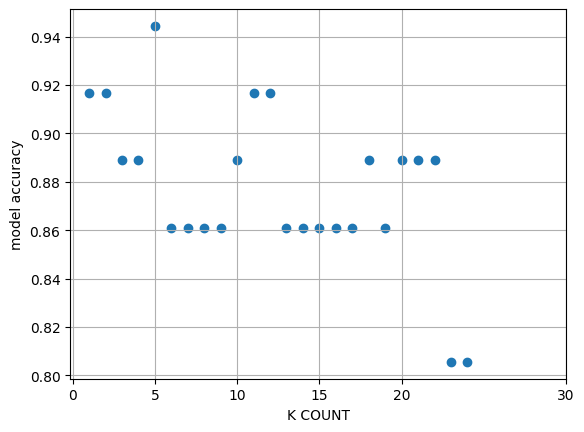

In [8]:
# Evaluate model accuracy for different values of K (1 to 24) using custom KNN implementation with Manhattan distance and normalized data
k_range = range(1,25)
nscores1= []
predic={}
for n in k_range:
    knnhandmade1=KNN(k=n,distance_metric="manhattan")

    knnhandmade1.fit(normalized_x_train,y_train.values)
    ypred=knnhandmade1.predict(normalized_x_test)
    predic[n]=ypred
    acc=np.sum(predic[n]==y_test)/len(y_test)
    nscores1.append(acc)
    # Plot accuracy vs. K value for the custom KNN with Manhattan distance and normalized data
plt.figure()
plt.xlabel("K COUNT")
plt.ylabel("model accuracy")
plt.scatter(k_range,nscores1)
plt.grid()
plt.xticks([0,5,10,15,20,30])
plt.show()

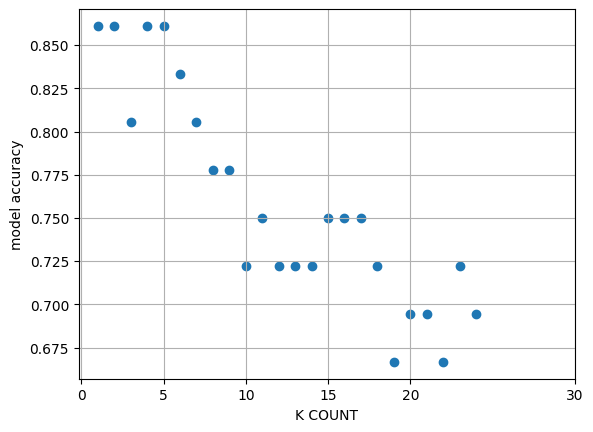

In [9]:
# Evaluate model accuracy for different values of K (1 to 24) using custom KNN implementation with Euclidean distance and normalized data
k_range = range(1,25)
nscores2= []
predic={}
for n in k_range:
    knnhandmade1=KNN(k=n,distance_metric="euclidean")

    knnhandmade1.fit(normalized_x_train,y_train.values)
    ypred=knnhandmade1.predict(normalized_x_test)
    predic[n]=ypred
    acc=np.sum(predic[n]==y_test)/len(y_test)
    nscores2.append(acc)
    # Plot accuracy vs. K value for the custom KNN with Euclidean distance and normalized data
plt.figure()
plt.xlabel("K COUNT")
plt.ylabel("model accuracy")
plt.scatter(k_range,nscores2)
plt.grid()
plt.xticks([0,5,10,15,20,30])
plt.show()

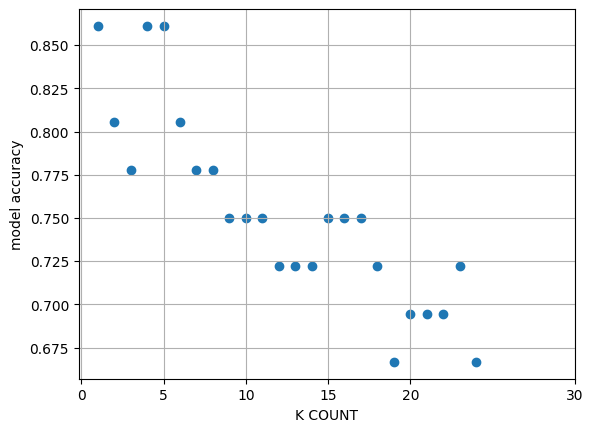

In [10]:
k_range = range(1,25)
nscores3= []
predic={}
for n in k_range:
    knn2=KNeighborsClassifier(n_neighbors=n)

    knn2.fit(normalized_x_train,y_train)
    nscores3.append(knn2.score(normalized_x_test,y_test))
plt.figure()
plt.xlabel("K COUNT")
plt.ylabel("model accuracy")
plt.scatter(k_range,nscores3)
plt.grid()
plt.xticks([0,5,10,15,20,30])
plt.show()

In [20]:
# Train KNN models with K=5 for different distance metrics (Manhattan, Euclidean, Sklearn) and compute confusion matrices
knnhandmade3=KNN(k=5,distance_metric="manhattan")
knnhandmade3.fit(normalized_x_train1,y_train.values)
ypred=knnhandmade3.predict(normalized_x_test1)

knnhandmade2=KNN(k=5,distance_metric="euclidean")
knnhandmade2.fit(normalized_x_train1,y_train.values)
ypred1=knnhandmade2.predict(normalized_x_test1)

knn2=KNeighborsClassifier(n_neighbors=5)
knn2.fit(normalized_x_train1,y_train)
ypred2=knn2.predict(normalized_x_test1)
# Create confusion matrices for the predictions of each model
cm1=confusion_matrix(y_test,ypred)
cm2=confusion_matrix(y_test,ypred1)
cm3=confusion_matrix(y_test,ypred2)

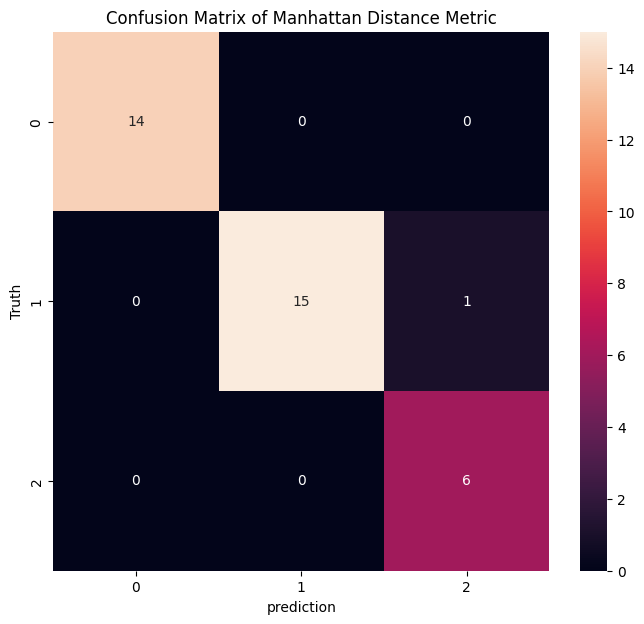

In [21]:
# Plot confusion matrix for the model using Manhattan distance
plt.figure(figsize=(8,7))
sns.heatmap(cm1,annot=True)
plt.title("Confusion Matrix of Manhattan Distance Metric")
plt.ylabel("Truth")
plt.xlabel("prediction")
plt.show()

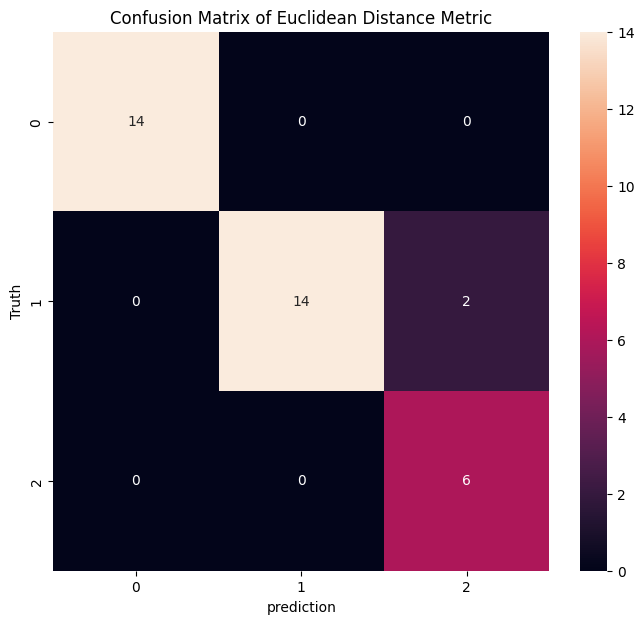

In [22]:
# Plot confusion matrix for the model using Euclidean distance
plt.figure(figsize=(8,7))
sns.heatmap(cm2,annot=True)
plt.title("Confusion Matrix of Euclidean Distance Metric")
plt.ylabel("Truth")
plt.xlabel("prediction")
plt.show()

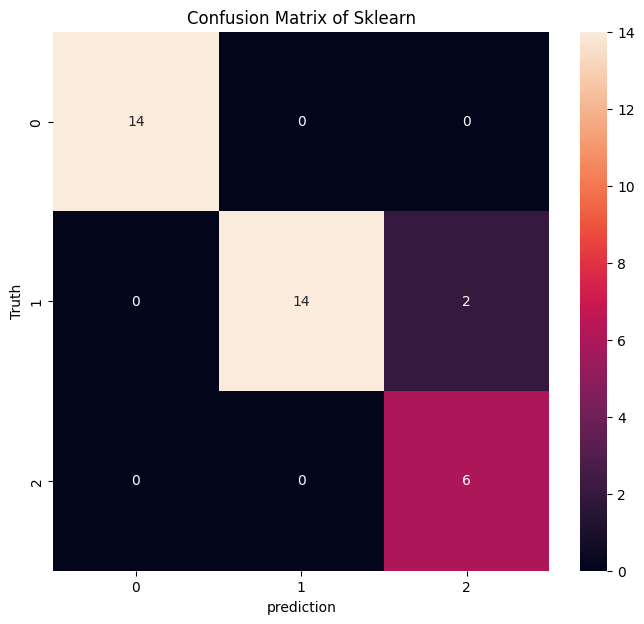

In [23]:
# Plot confusion matrix for the model using Sklearn KNeighborsClassifier
plt.figure(figsize=(8,7))
sns.heatmap(cm2,annot=True)
plt.title("Confusion Matrix of Sklearn")
plt.ylabel("Truth")
plt.xlabel("prediction")
plt.show()

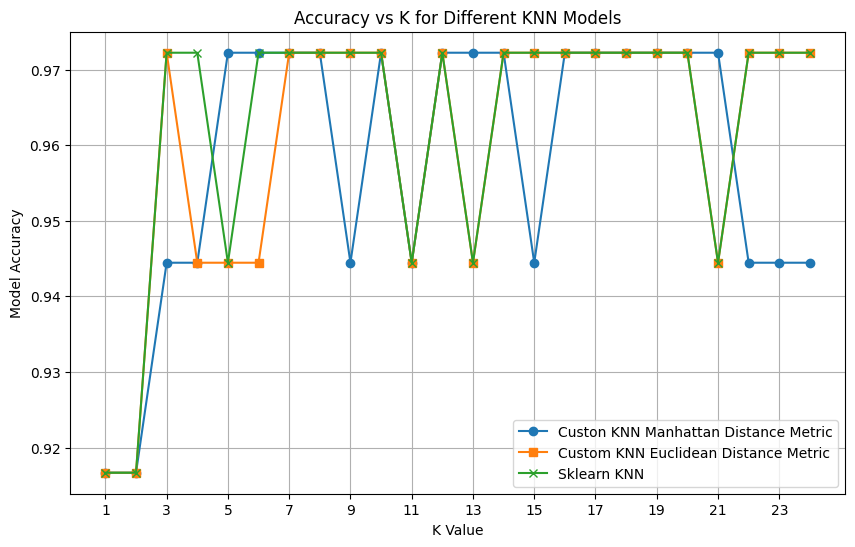

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, scores3, label="Custon KNN Manhattan Distance Metric", marker='o')
plt.plot(k_range, scores2, label="Custom KNN Euclidean Distance Metric", marker='s')
plt.plot(k_range, scores1, label="Sklearn KNN", marker='x')

plt.xlabel("K Value")
plt.ylabel("Model Accuracy")
plt.title("Accuracy vs K for Different KNN Models")
plt.legend()
plt.grid(True)
plt.xticks(range(1, 25, 2))  # Adjust the frequency of ticks on the x-axis
plt.show()

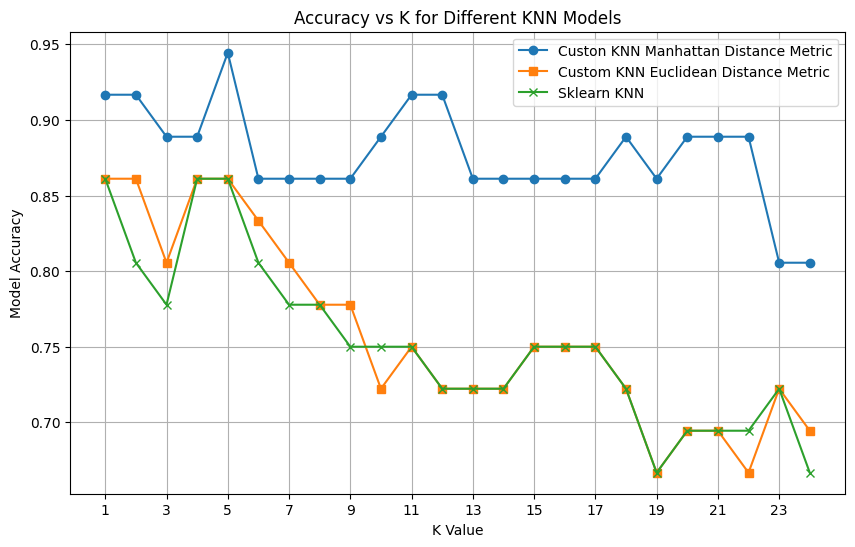

In [12]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, nscores1, label="Custon KNN Manhattan Distance Metric", marker='o')
plt.plot(k_range, nscores2, label="Custom KNN Euclidean Distance Metric", marker='s')
plt.plot(k_range, nscores3, label="Sklearn KNN", marker='x')

plt.xlabel("K Value")
plt.ylabel("Model Accuracy")
plt.title("Accuracy vs K for Different KNN Models")
plt.legend()
plt.grid(True)
plt.xticks(range(1, 25, 2))  # Adjust the frequency of ticks on the x-axis
plt.show()

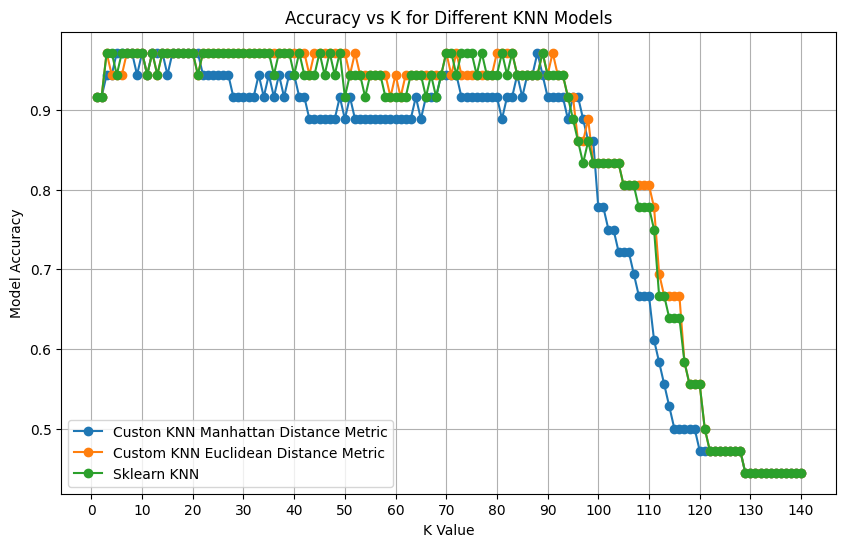

In [24]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, fscores3, label="Custon KNN Manhattan Distance Metric", marker='o')
plt.plot(k_range, fscores2, label="Custom KNN Euclidean Distance Metric", marker='o')
plt.plot(k_range, fscores1, label="Sklearn KNN", marker='o')

plt.xlabel("K Value")
plt.ylabel("Model Accuracy")
plt.title("Accuracy vs K for Different KNN Models")
plt.legend()
plt.grid(True)
plt.xticks(range(0, 141, 10))  # Adjust the frequency of ticks on the x-axis
plt.show()